<a href="https://colab.research.google.com/github/vavme/Bangkit-Capstone-Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rice disease detection using Convolutional Neural Networks

#1. Import some modules
We use numpy to process the image input, TensorFlow to build our model and matplotlib to plot some metrics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#2. Load the base of the model
In this project, we use VGG19 (Visual Geometry Group 19) CNN architecture as the base of our model.

In [2]:
base_model = tf.keras.applications.VGG19(input_shape=(256,256,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False #we won't retrain the base
#base_model.summary()

80150528/80134624 [==============================] - 1s 0us/step


# 3. Processing the dataset
Unzip the zipped version of the dataset which can be downloaded here https://drive.google.com/file/d/1HG_k9Cc2Asvtf_gNKtrsy0jtcO_um3Da/view?usp=sharing.

In [7]:
import zipfile

local_zip = '/content/Paddy2.zip' 

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content') #extracting the zip file
zip_ref.close()

We use ImageDataGenerator to generate the training and validation data.

In [8]:
train_dir = '/content/Paddy2/Training'
validation_dir = '/content/Paddy2/Validation'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 360,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 8,
                                                    class_mode = 'categorical', 
                                                    target_size = (256, 256))

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                    batch_size =8,
                                                    class_mode = 'categorical', 
                                                    target_size = (256, 256))

Found 360 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


# 4. Add some layers on top of our base model
We add some dense and dropout layers to the base of the model (i.e., the VGG19 architecture model).

In [9]:
last_layer=base_model.get_layer('block5_pool') #last layer
last_output=last_layer.output

y = tf.keras.layers.Flatten()(last_output)
y = tf.keras.layers.Dense(254, activation="relu")(y)
y=tf.keras.layers.Dense(124,activation='relu')(y)
y = tf.keras.layers.Dropout(0.2)(y)                  
y = tf.keras.layers.Dense(6,activation='softmax')(y) 

model2 = tf.keras.Model(base_model.input, y) 

model2.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

#model2.summary()

#5. Train our model

In [10]:
#Training
historyM2 = model2.fit(train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 40,
            epochs = 100,
            validation_steps = 8,
            verbose = 1)

Epoch 1/100
40/40 [==============================] - 22s 229ms/step - loss: 3.3828 - acc: 0.1437 - val_loss: 1.5075 - val_acc: 0.4531
Epoch 2/100
40/40 [==============================] - 9s 222ms/step - loss: 1.5826 - acc: 0.3344 - val_loss: 1.3050 - val_acc: 0.3750
Epoch 3/100
40/40 [==============================] - 9s 222ms/step - loss: 1.4613 - acc: 0.3125 - val_loss: 1.2596 - val_acc: 0.2656
Epoch 4/100
40/40 [==============================] - 9s 226ms/step - loss: 1.3626 - acc: 0.3688 - val_loss: 1.1726 - val_acc: 0.4844
Epoch 5/100
40/40 [==============================] - 9s 223ms/step - loss: 1.3107 - acc: 0.3625 - val_loss: 1.2201 - val_acc: 0.4062
Epoch 6/100
40/40 [==============================] - 9s 223ms/step - loss: 1.2741 - acc: 0.4125 - val_loss: 1.2034 - val_acc: 0.4062
Epoch 7/100
40/40 [==============================] - 9s 223ms/step - loss: 1.3382 - acc: 0.4031 - val_loss: 1.0939 - val_acc: 0.3906
Epoch 8/100
40/40 [==============================] - 9s 223ms/step -

#6. Plot the metrics
First we plot the training accuracy and validation accuracy to evaluate our model.

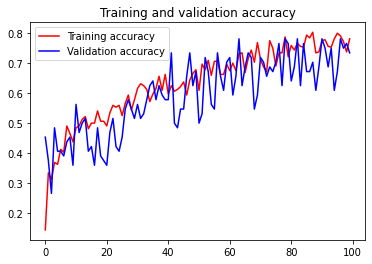

<Figure size 432x288 with 0 Axes>

In [11]:
acc = historyM2.history['acc']
val_acc = historyM2.history['val_acc']
loss = historyM2.history['loss']
val_loss = historyM2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Training loss and validation loss.

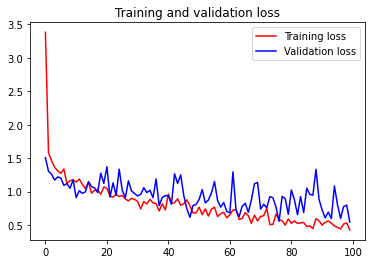

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

#7. Exporting the trained model
We export as h5 file (Keras savefile format) and then download the file to be used locally and to be uploaded on our cloud server.

In [13]:
export_path_keras = "/content/Model2.h5"
print(export_path_keras)

model2.save(export_path_keras)

/content/Model2.h5


In [ ]:
from google.colab import files
files.download('/content/Model2.h5') 

# References and datasets used:
* [1] Rhiyas, S. (2019, July). Rice Leafs, Version 1. Retrieved May 18, 2021 from https://www.kaggle.com/shayanriyaz/riceleafs.
* [2] Setiady, T. (2021, May). Leaf Rice Disease, Version 1. Retrieved May 19, 2021 from https://www.kaggle.com/tedisetiady/leaf-rice-disease-indonesia.